In [44]:
cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [1]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

Exp data

In [26]:
exp_E, exp_FWHM = np.load('./C4H2I2S-exp.npy')

mcvine data

In [46]:
mcvine_E, mcvine_FWHM = np.load('./mcvine-res-Ei_100.npy')

PyChop

In [3]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [4]:
from PyChop import PyChop2

In [59]:
instrument = PyChop2(
    '/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop/arcs-opt.yaml', 'ARCS-100-1.5-SMI', 600)

In [60]:
instrument.ei = 100

In [61]:
instrument.moderator.mod_pars

[281.13, 79.0, 0.087, 0.4, 172.42]

In [62]:
instrument.moderator.mod_pars[0] = 281.

In [63]:
mp = instrument.moderator.mod_pars

In [64]:
for i in range(4):
    mp[i] *= 2

In [65]:
mp

[562.0, 158.0, 0.174, 0.8, 172.42]

In [66]:
instrument.chopper_system.package

'ARCS-100-1.5-SMI'

In [67]:
fc = instrument.chopper_system.packages['ARCS-100-1.5-SMI']

In [68]:
fc.pslit

1.52

In [69]:
fc.pslit=3

In [70]:
instrument.aperture_width

0.0

Flux = 24127.4969125 n/cm^2/s

EN(meV)  FWHM(meV)


<IPython.core.display.Javascript object>


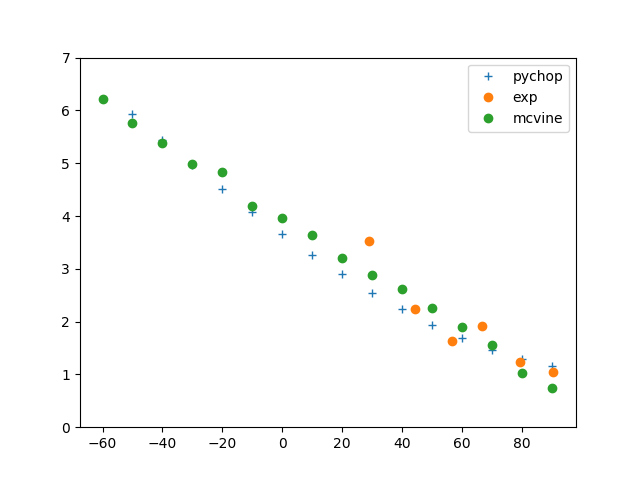

In [71]:
print "Flux = " + str(instrument.getFlux()[0]) + ' n/cm^2/s'
print
print "EN(meV)  FWHM(meV)"
en = np.arange(-50, 100, 10)
res = np.zeros(en.shape)
for i, x in enumerate(en):
    res[i] = y = instrument.getResolution(x)
    # print "%0.2f     %0.3f" % (x, y)
    
plt.figure()
plt.plot(en, res, '+', label='pychop')
plt.plot(exp_E, exp_FWHM, 'o', label='exp')
plt.plot(mcvine_E, mcvine_FWHM, 'o', label='mcvine')
plt.ylim(0, 7)
plt.legend()